In [74]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np 

## load the dataset 

In [75]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [76]:
X_train.shape

(50000, 32, 32, 3)

In [77]:
 X_test.shape

(10000, 32, 32, 3)

In [78]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [79]:
y_train = y_train.reshape(-1,) # reshapping 2D into 1D array 

In [80]:
y_train [:4]

array([6, 9, 9, 4], dtype=uint8)

In [81]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [82]:
def plot_sample( X,y ,index):
    plt.figure(figsize= (12,2))
    plt.imshow(X[index])

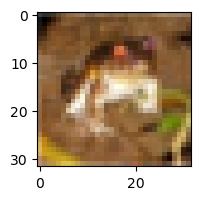

In [83]:
plot_sample(X_train, y_train, 0)

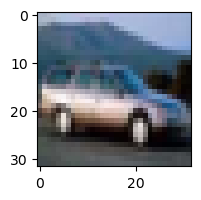

In [84]:
plot_sample(X_train, y_train, 4)

## normalizing the training data 

In [85]:
X_train 

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [86]:
X_train = X_train/255.0
X_test = X_test/255.0
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

## building the cnn for image classification 

In [87]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32 , kernel_size = (3,3) , activation = 'relu' , input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)) ,
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

   layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])    

In [88]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 33s 20ms/step - loss: 1.5328 - accuracy: 0.4468
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1754 - accuracy: 0.5842
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0310 - accuracy: 0.6422
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9505 - accuracy: 0.6706
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8871 - accuracy: 0.6940
Epoch 6/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8370 - accuracy: 0.7113
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7961 - accuracy: 0.7243
Epoch 8/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7592 - accuracy: 0.7390
Epoch 9/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7277 - accuracy: 0.7470
Epoch 10/10
1563/1563 [==============================] - 32s 21m

In [90]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.9379 - accuracy: 0.6830


[0.9378717541694641, 0.6830000281333923]

In [91]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[4.12647409e-04, 6.67417407e-05, 7.93314353e-03, 6.33528531e-01,
        4.70370724e-04, 1.89954862e-01, 1.10370270e-03, 2.88078305e-03,
        1.63444042e-01, 2.05130535e-04],
       [3.00264638e-03, 4.36722720e-03, 1.28483507e-07, 1.11584221e-07,
        2.27761010e-09, 3.24703514e-10, 2.98402769e-09, 1.04417697e-09,
        9.92170274e-01, 4.59631439e-04],
       [3.55463587e-02, 8.46545547e-02, 2.48926179e-03, 1.50121544e-02,
        3.93569295e-04, 1.23936951e-03, 5.65800641e-04, 1.67753536e-03,
        8.44337165e-01, 1.40842283e-02],
       [7.40855157e-01, 2.91194930e-03, 2.85931565e-02, 2.09217542e-03,
        2.79311417e-03, 1.76684516e-05, 4.06705105e-04, 1.12277312e-05,
        2.22096413e-01, 2.22425209e-04],
       [3.15798825e-05, 1.07208488e-03, 4.40777689e-02, 5.25953807e-02,
        1.47343799e-01, 1.91072281e-02, 7.35611200e-01, 3.24806970e-05,
        1.13172384e-04, 1.52841894e-05]], dtype=float32)

In [92]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

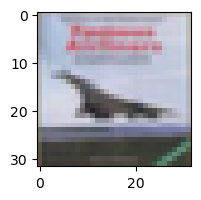

In [93]:
plot_sample(X_test, y_test,3)

In [94]:
classes[y_classes[3]]

'airplane'